In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [2]:
os.chdir('G:\My Drive\Articles\Article_Reconstruction\Manuscript\EMBO\Revisons')
folder = './output Tamara and Kasia'
sub_folders = np.sort([name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))])
print(sub_folders)

['plate 1_01_siPOOL' 'plate 1_02_siPOOL' 'plate 2_01_siPOOL'
 'plate 2_02_siPOOL']


In [3]:
results = pd.DataFrame()
for idx,f in enumerate(sub_folders):
    df = pd.read_csv(folder+'/'+f+'/Results.csv')
    results = pd.concat((results, df['Length']), ignore_index=True, sort=False,axis=1)
results

0         1         2         3
0    1.285984  1.627135  1.371998  1.573020
1    0.625174  0.653848  1.078917  1.338694
2    0.587042  1.031618  1.528661  1.125193
3    1.496206  0.666992  1.545884  0.929129
4    0.745356  0.621518  1.584566  0.831769
..        ...       ...       ...       ...
110       NaN       NaN  1.397542       NaN
111       NaN       NaN  0.723190       NaN
112       NaN       NaN  0.937500       NaN
113       NaN       NaN  0.972718       NaN
114       NaN       NaN  1.272881       NaN

[115 rows x 4 columns]

In [4]:
results.rename(columns={0: sub_folders[0]},inplace=True)
results.rename(columns={1: sub_folders[1]},inplace=True)
results.rename(columns={2: sub_folders[2]},inplace=True)
results.rename(columns={3: sub_folders[3]},inplace=True)


Text(0.5, 0, 'Sample')

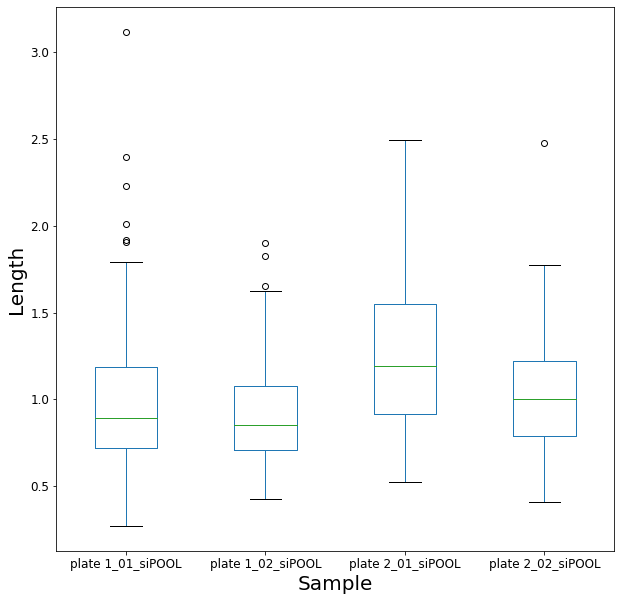

In [5]:
boxplot = results.boxplot(column=[sub_folders[0], sub_folders[1], sub_folders[2],sub_folders[3]],figsize=(10,10),fontsize=12,grid=False)
boxplot.set_ylabel('Length',fontsize=20)
boxplot.set_xlabel('Sample',fontsize=20)



In [37]:
from scipy import stats 


In [40]:
cleanedList0 = [x for x in results[sub_folders[0]] if str(x) != 'nan']
cleanedList1 = [x for x in results[sub_folders[1]] if str(x) != 'nan']
cleanedList2 = [x for x in results[sub_folders[2]] if str(x) != 'nan']
cleanedList3 = [x for x in results[sub_folders[3]] if str(x) != 'nan']
df = pd.DataFrame([*cleanedList0, *cleanedList1, *cleanedList2, *cleanedList3] ,columns=['length'])
df['group'] =  [*np.repeat(sub_folders[0],len(cleanedList0)),*np.repeat(sub_folders[1],len(cleanedList1)),*np.repeat(sub_folders[2],len(cleanedList2)),*np.repeat(sub_folders[3],len(cleanedList3))]
# F, p = stats.f_oneway(cleanedList0,cleanedList1,cleanedList2,cleanedList3)

df

length              group
0    1.285984  plate 1_01_siPOOL
1    0.625174  plate 1_01_siPOOL
2    0.587042  plate 1_01_siPOOL
3    1.496206  plate 1_01_siPOOL
4    0.745356  plate 1_01_siPOOL
..        ...                ...
352  1.644250  plate 2_02_siPOOL
353  0.621518  plate 2_02_siPOOL
354  0.608462  plate 2_02_siPOOL
355  0.959239  plate 2_02_siPOOL
356  0.780069  plate 2_02_siPOOL

[357 rows x 2 columns]

In [41]:
import pingouin as pg


In [45]:
aov = pg.anova(data=df,dv='length',between='group', detailed=True)
print(aov)

   Source         SS   DF        MS          F         p-unc       np2
0   group   5.367326    3  1.789109  10.902583  7.264875e-07  0.084799
1  Within  57.927130  353  0.164100        NaN           NaN       NaN


In [47]:
pt = pg.pairwise_tukey(dv='length', between='group', data=df)
pt

A                  B   mean(A)   mean(B)      diff  \
0  plate 1_01_siPOOL  plate 1_02_siPOOL  1.007908  0.929934  0.077974   
1  plate 1_01_siPOOL  plate 2_01_siPOOL  1.007908  1.248944 -0.241036   
2  plate 1_01_siPOOL  plate 2_02_siPOOL  1.007908  1.038888 -0.030981   
3  plate 1_02_siPOOL  plate 2_01_siPOOL  0.929934  1.248944 -0.319010   
4  plate 1_02_siPOOL  plate 2_02_siPOOL  0.929934  1.038888 -0.108954   
5  plate 2_01_siPOOL  plate 2_02_siPOOL  1.248944  1.038888  0.210055   

         se         T   p-tukey    hedges  
0  0.064673  1.205655  0.623657  0.191608  
1  0.054816 -4.397155  0.000085 -0.592957  
2  0.061367 -0.504845  0.957900 -0.076154  
3  0.063496 -5.024114  0.000005 -0.784139  
4  0.069230 -1.573811  0.394941 -0.267476  
5  0.060124  3.493677  0.003005  0.516466

In [49]:
pt.to_csv('G:\My Drive\Articles\Article_Reconstruction\Manuscript\EMBO\Revisons\Summary_LAN2_paired.csv')